In [2]:
# snippet from ~/Library/Jupyter/nbextensions/snippets/snippets.json
# basic
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import csv
import os, sys
import dill
import seaborn as sns

from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer



tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
stemmer = SnowballStemmer('english')
stop_stems = dill.load(open("/Users/nknezek/Documents/Insight_local/project/data/wordlists/stop_words/stop_stems.m",'rb'))

In [5]:
folder = "/Users/nknezek/Documents/Insight_local/project/data/wordlists/SCOWL-custom/"
infilename = "words.txt"
cleanfilename = "cleanwords.txt"
stemfilename = "stems.txt"
cleanfile = open(folder+cleanfilename,'a')
stemfile = open(folder+stemfilename,'a')
stems = set()
with open(folder+infilename,'r') as infile:
    for l in infile:
        tokens = tokenizer.tokenize(l.lower())
        for token in tokens:
            if len(token) > 0 and len(token) < 20: # removes non words
                st = stemmer.stem(token)
                if st not in stems:
                    if (st not in stop_stems):
                        stems.add(st)
                        cleanfile.write(st+','+l)
                        stemfile.write(st+'\n')                        
cleanfile.close()
stemfile.close()
print(stems)

{'hosel', 'bodhran', 'cataract', 'nielli', 'buckwash', 'betweenmaid', 'busker', 'sanpan', 'popish', 'terlingua', 'pippa', 'lustick', 'haman', 'chorioallanto', 'ichthyolatri', 'realo', 'mistold', 'heraldri', 'bindabl', 'athrocytos', 'bonham', 'piositi', 'scena', 'ecc', 'helvellyn', 'rowdiest', 'patron', 'steapsin', 'mixen', 'bathypelag', 'theftuous', 'coset', 'positivest', 'heep', 'klinostat', 'emict', 'burka', 'excipi', 'maryolatri', 'cremorn', 'malthous', 'asmould', 'fleerer', 'micros', 'sklent', 'hazmat', 'moxe', 'abbaci', 'sturdier', 'underreport', 'palmyra', 'durian', 'hoboism', 'guidon', 'pottsboro', 'parisyllab', 'tetramethyllead', 'kanares', 'hypermetabol', 'crabmeat', 'hoser', 'spirographi', 'duewest', 'insubstanti', 'presidenti', 'allegori', 'micrograph', 'clovepink', 'transatlant', 'capellin', 'hew', 'eoan', 'jamesburg', 'meterag', 'crepuscl', 'echinococcosi', 'feast', 'latex', 'nimbus', 'alcoholomet', 'benzimidazol', 'norcatur', 'bruckl', 'cane', 'salverform', 'undistort', '

In [6]:
dill.dump(stems,open(folder+'vocab_stems.m','wb'))

# Describe stems

In [29]:
print(len(stems))

129187


In [33]:
lns = list(map(len,stems))

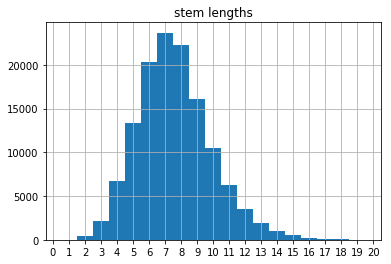

In [48]:
plt.hist(lns,bins=np.linspace(0.5,19.5,20))
plt.xticks(np.linspace(0,20,21))
plt.title("stem lengths")
plt.grid()
plt.savefig(folder+'stemlengths.pdf')